In [60]:
import os

DIR = "data/fungi_train_val"
filelist = []

for cat in os.listdir(DIR):
    for img in os.listdir(DIR + "/" + cat):
        filelist.append({
            'category': cat[cat.index('_')+1:].replace('_', ' '),
            'filename': img, 
            'path': DIR + "/" + cat + "/" + img, 
            'training': 1})
        
print("Categories:", len(os.listdir(DIR)))
print("Elements:", len(filelist))

Categories: 1394
Elements: 89760


In [61]:
import random

training_size = 0.9
val_set_indexes = []

while len(val_set_indexes) <= int(len(filelist)*(1-training_size)):
    rand = random.randint(0, len(filelist)-1)
    if rand not in val_set_indexes:
        val_set_indexes.append(rand)

for i in range(len(filelist)):
    if i in val_set_indexes:
        filelist[i]['training'] = 0
    else:
        filelist[i]['training'] = 1
        
training_set = list(filter(lambda x: x['training'] == 1, filelist))
validation_set = list(filter(lambda x: x['training'] == 0, filelist))

print("Training set:", len(training_set))
print("Validation set:", len(validation_set))

Training set: 80784
Validation set: 8976


In [43]:
import json

with open('data/train.json') as f:
  data = json.load(f)

{'filename': 'SVEND2012PIC89742273.JPG', 'path': 'data/fungi_train_val/60852_Lyomyces_sambuci/SVEND2012PIC89742273.JPG', 'training': 1}


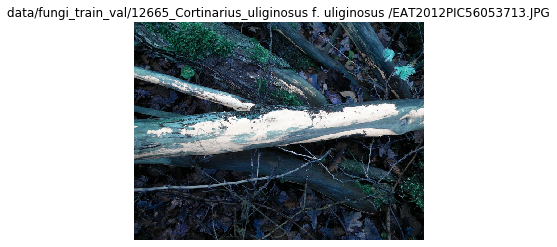

In [5]:
import cv2 
import matplotlib.pyplot as plt

choosen = random.randint(0, len(filelist)-1)
print(filelist[choosen])

img = cv2.imread(filelist[choosen]['path'])  
plt.title(filelist[0]['path'])
plt.grid(False)
plt.axis('off')
plt.imshow(img)
plt.show()

In [6]:
image_id = list(filter(
    lambda x: x['file_name'].replace("images/", "data/fungi_train_val/") == filelist[choosen]['path'],
    data['images']))[0]['id']
category_id = list(filter(lambda x: x['image_id'] == image_id, data['annotations']))[0]['category_id']
category = list(filter(lambda x: x['id'] == category_id, data['categories']))
print(filelist[choosen]['path'], category)

data/fungi_train_val/60852_Lyomyces_sambuci/SVEND2012PIC89742273.JPG [{'id': 1232, 'name': 'Lyomyces sambuci', 'supercategory': 'Lyomyces'}]


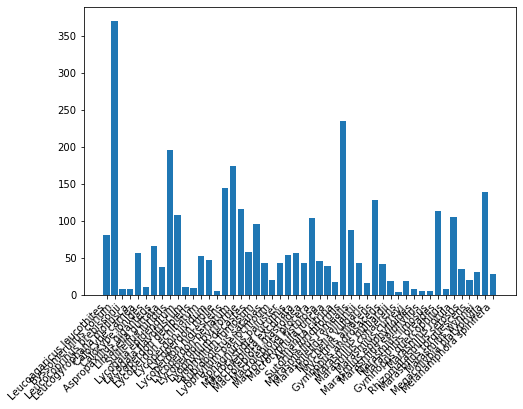

In [7]:
from collections import Counter

occ = Counter(list(map(lambda x: x['category_id'], data['annotations'])))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = list(map(lambda x: x['name'], data['categories']))[:50]
y = [occ[el] for el in occ][:50]
ax.bar(x, y)
ax.set_xticklabels(x, rotation=45, ha='right')
plt.show()

In [47]:
import pandas as pd

for i in range(len(data['images'])):
    data['images'][i]['file_name'] = data['images'][i]['file_name'].replace("images/", "data/fungi_train_val/")

df_images = pd.DataFrame(data['images'])
df_categories = pd.DataFrame(data['categories'])
df_annotations = pd.DataFrame(data['annotations'])
df_images.head()

df = pd.merge(df_images, df_annotations, left_on='id', right_on='image_id')
df = pd.merge(df, df_categories, left_on='category_id', right_on='id')
df.head()

,id_x,file_name,width,license,rights_holder,height,id_y,category_id,image_id,id,name,supercategory
0,21942,data/fungi_train_val/16390_Leucoagaricus_leuco...,1300,1,Ole B. Lyshede,732,43829,650,21942,650,Leucoagaricus leucothites,Leucoagaricus
1,21943,data/fungi_train_val/16390_Leucoagaricus_leuco...,1400,1,Ole B. Lyshede,788,44039,650,21943,650,Leucoagaricus leucothites,Leucoagaricus
2,21944,data/fungi_train_val/16390_Leucoagaricus_leuco...,1400,1,Ole B. Lyshede,788,44255,650,21944,650,Leucoagaricus leucothites,Leucoagaricus
3,22210,data/fungi_train_val/16390_Leucoagaricus_leuco...,567,1,Frank Desting,425,44614,650,22210,650,Leucoagaricus leucothites,Leucoagaricus
4,24812,data/fungi_train_val/16390_Leucoagaricus_leuco...,770,1,Frank Desting,577,45510,650,24812,650,Leucoagaricus leucothites,Leucoagaricus


In [63]:
df = pd.DataFrame(filelist)
df_training = df.loc[df['training'] == 1]
df_validation = df.loc[df['training'] == 0]

,category,filename,path,training
3,Cortinarius uliginosus f. uliginosus,LWL2011PIC60762408.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,0
17,Cortinarius uliginosus f. uliginosus,EAT2012PIC14943417.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,0
21,Cortinarius uliginosus f. uliginosus,EAT2015PIC34199045.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,0
25,Cortinarius uliginosus f. uliginosus,HM2013PIC37741637.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,0
26,Cortinarius uliginosus f. uliginosus,EAT2016-9178142_BklxW613A.JPG,data/fungi_train_val/12665_Cortinarius_uligino...,0
...,...,...,...,...
89740,Cheilymenia granulata,MACH2016-9183544_rkJdqd2Mg.JPG,data/fungi_train_val/12195_Cheilymenia_granula...,0
89747,Cheilymenia granulata,MACH2016-9183543_HygQVunfe.JPG,data/fungi_train_val/12195_Cheilymenia_granula...,0
89749,Cheilymenia granulata,MACH2016-9183561_HJ3uE53zg.JPG,data/fungi_train_val/12195_Cheilymenia_granula...,0
89752,Cheilymenia granulata,MACH2016-9183541_BJ8NxO3zx.JPG,data/fungi_train_val/12195_Cheilymenia_granula...,0


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DIR = os.getcwd()
training_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_dataframe(
    df_training,
    DIR,
    'path',
    
    target_size=(150, 150),
    class_mode='categorical'
)

KeyError: 'class'